I'm starting off by importing the main libraries for this data analysis.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's start off by reading in the csv and taking a look at the features and their types.

In [2]:
heart_df = pd.read_csv("../input/heart.csv")
heart_df.info()
heart_df.head()
heart_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In the way of exploratory data analysis, let us start off by lookng at some box plots of some variables. I have set a hue by the target column so we can find any trends from the box plots for patients who have heart disease and those who don't.

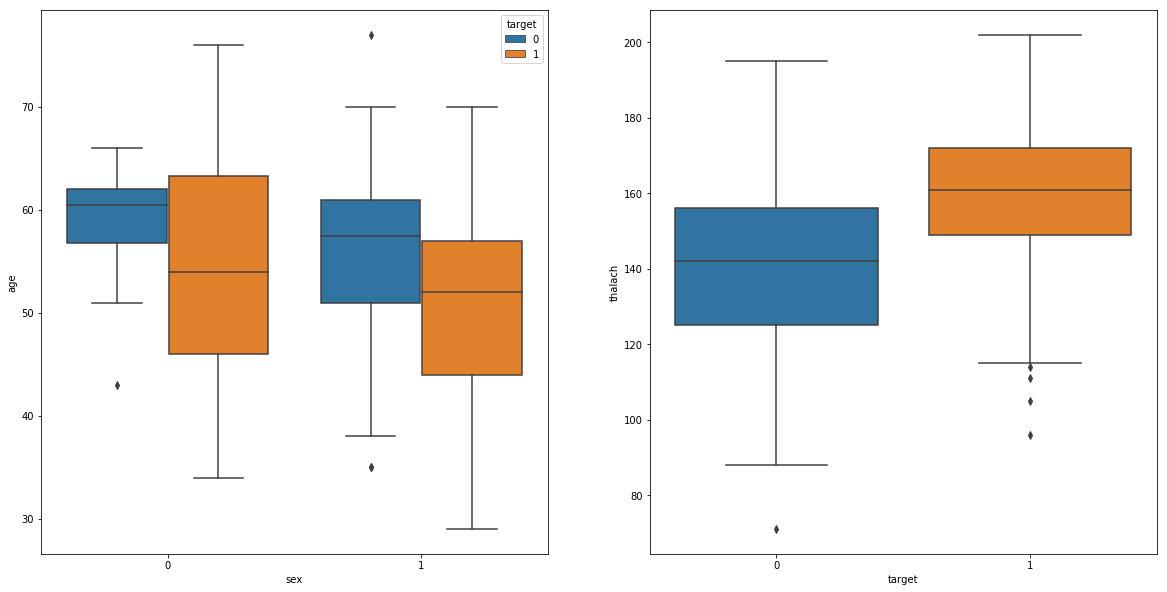

In [3]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.boxplot(x='sex', y='age', hue='target', data=heart_df, orient='v', ax=ax[0])
sns.boxplot(x='target', y='thalach', data=heart_df, ax=ax[1])



Another one of my favorite plots to look at is the pairplot. This is a pairwise scatterplot of every combination of input variables. We can also hue this by the target to see how separable the classes are.

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


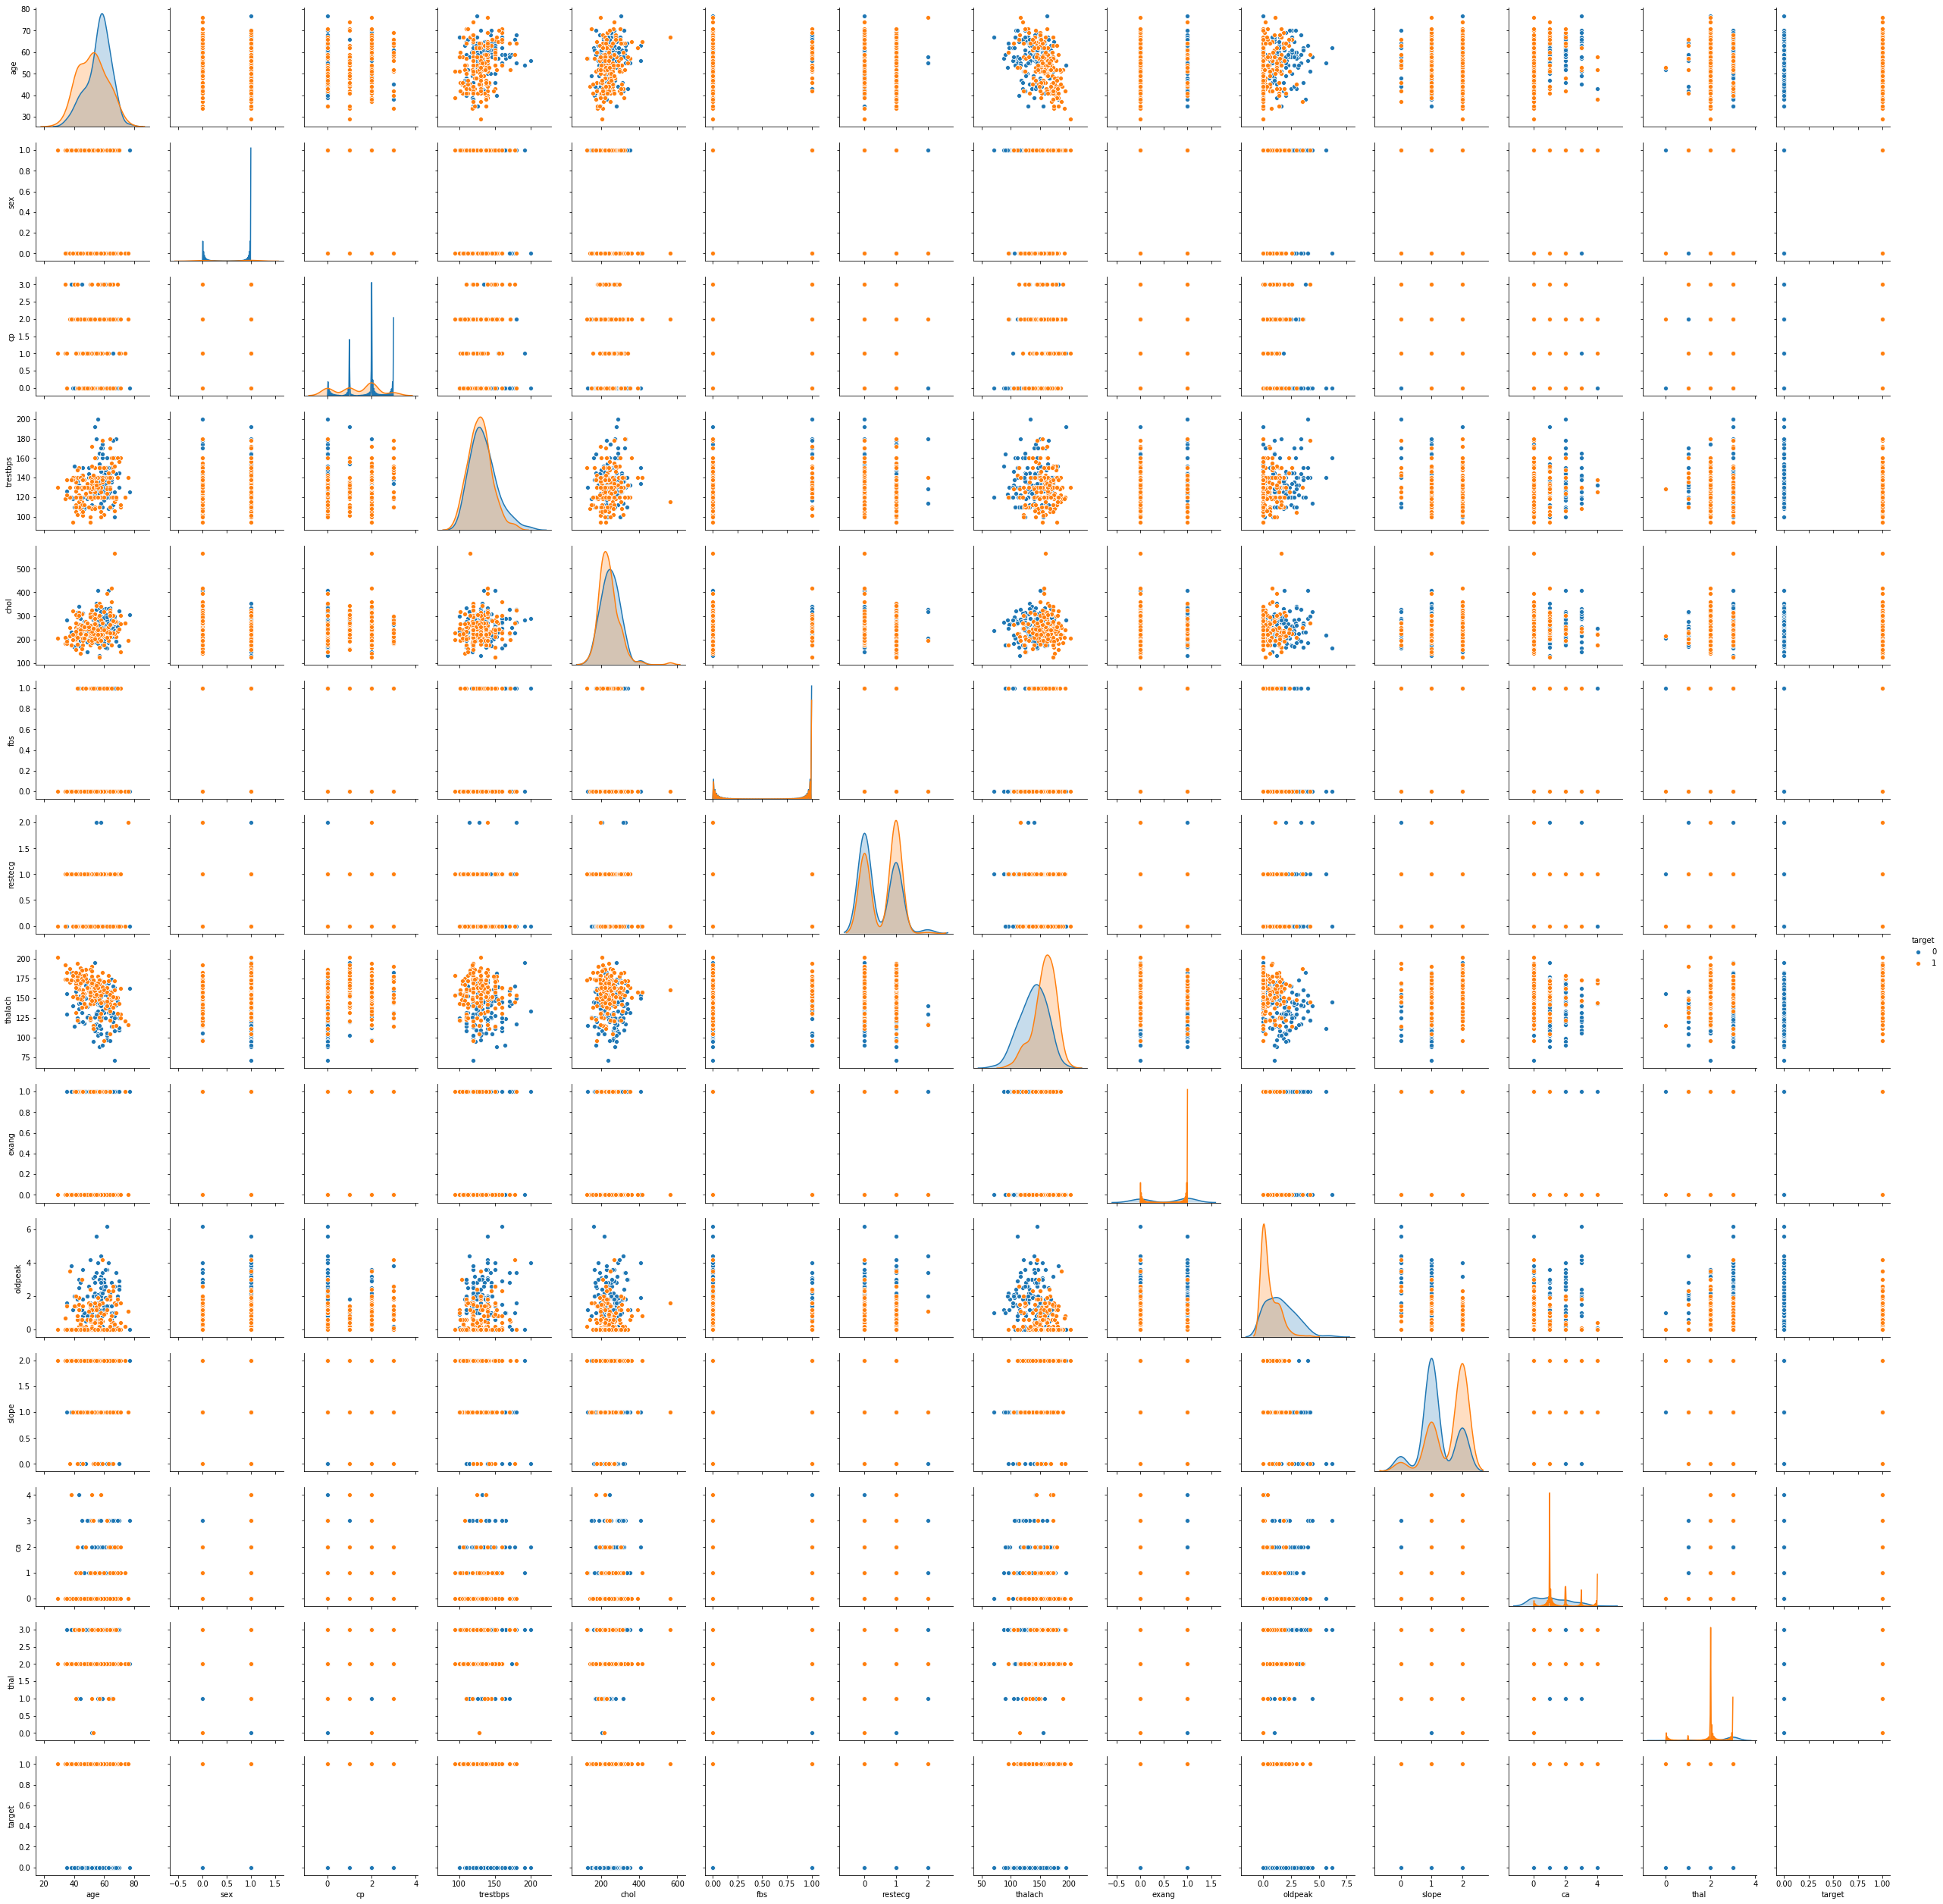

In [4]:
sns.pairplot(heart_df,hue='target')

Next we need to see if the data is balanced. The dataset is said to be balanced if both classes of the predicted variable have more or less equal representation. We can do this is many ways - the simplest is a histogram of the two classes

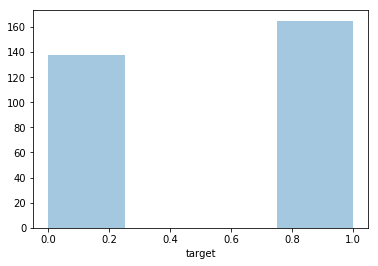

In [5]:
sns.distplot(heart_df['target'], kde=False)

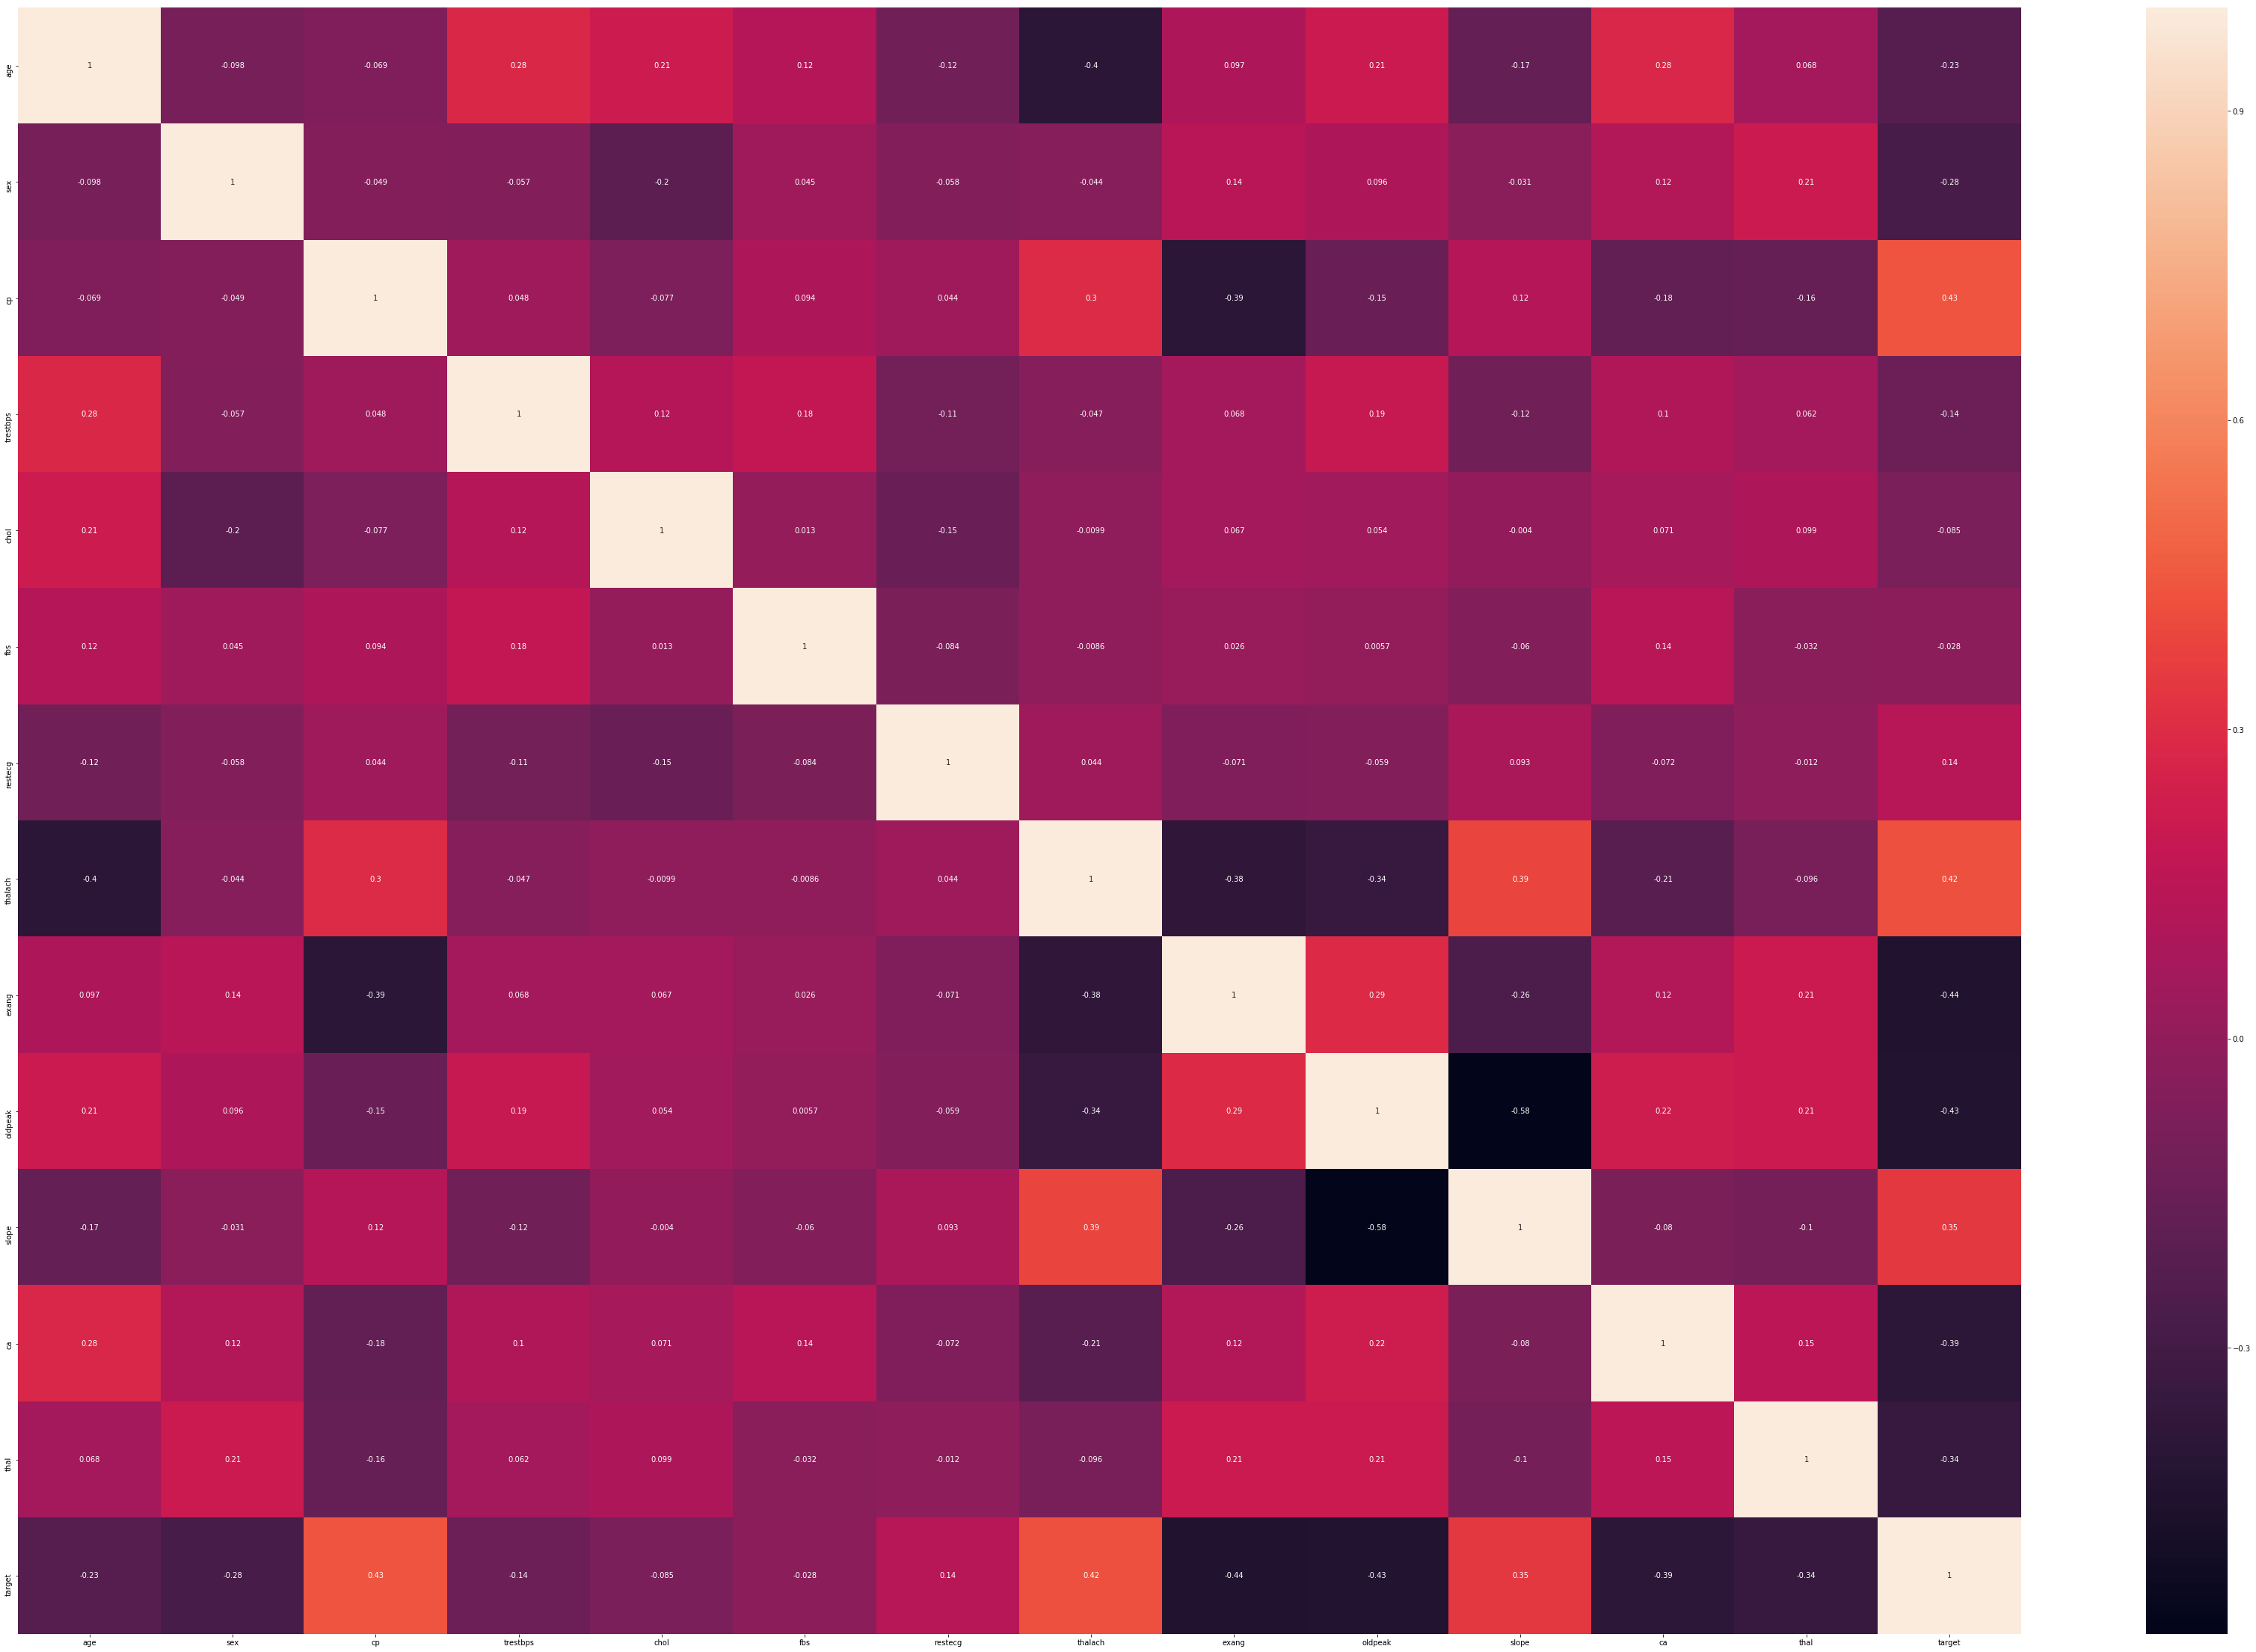

In [6]:
plt.figure(figsize=(60,40))
sns.heatmap(heart_df.corr(),annot=True)


There doesn't appear to be any pairs of highly correlated variables so we can proceed further.

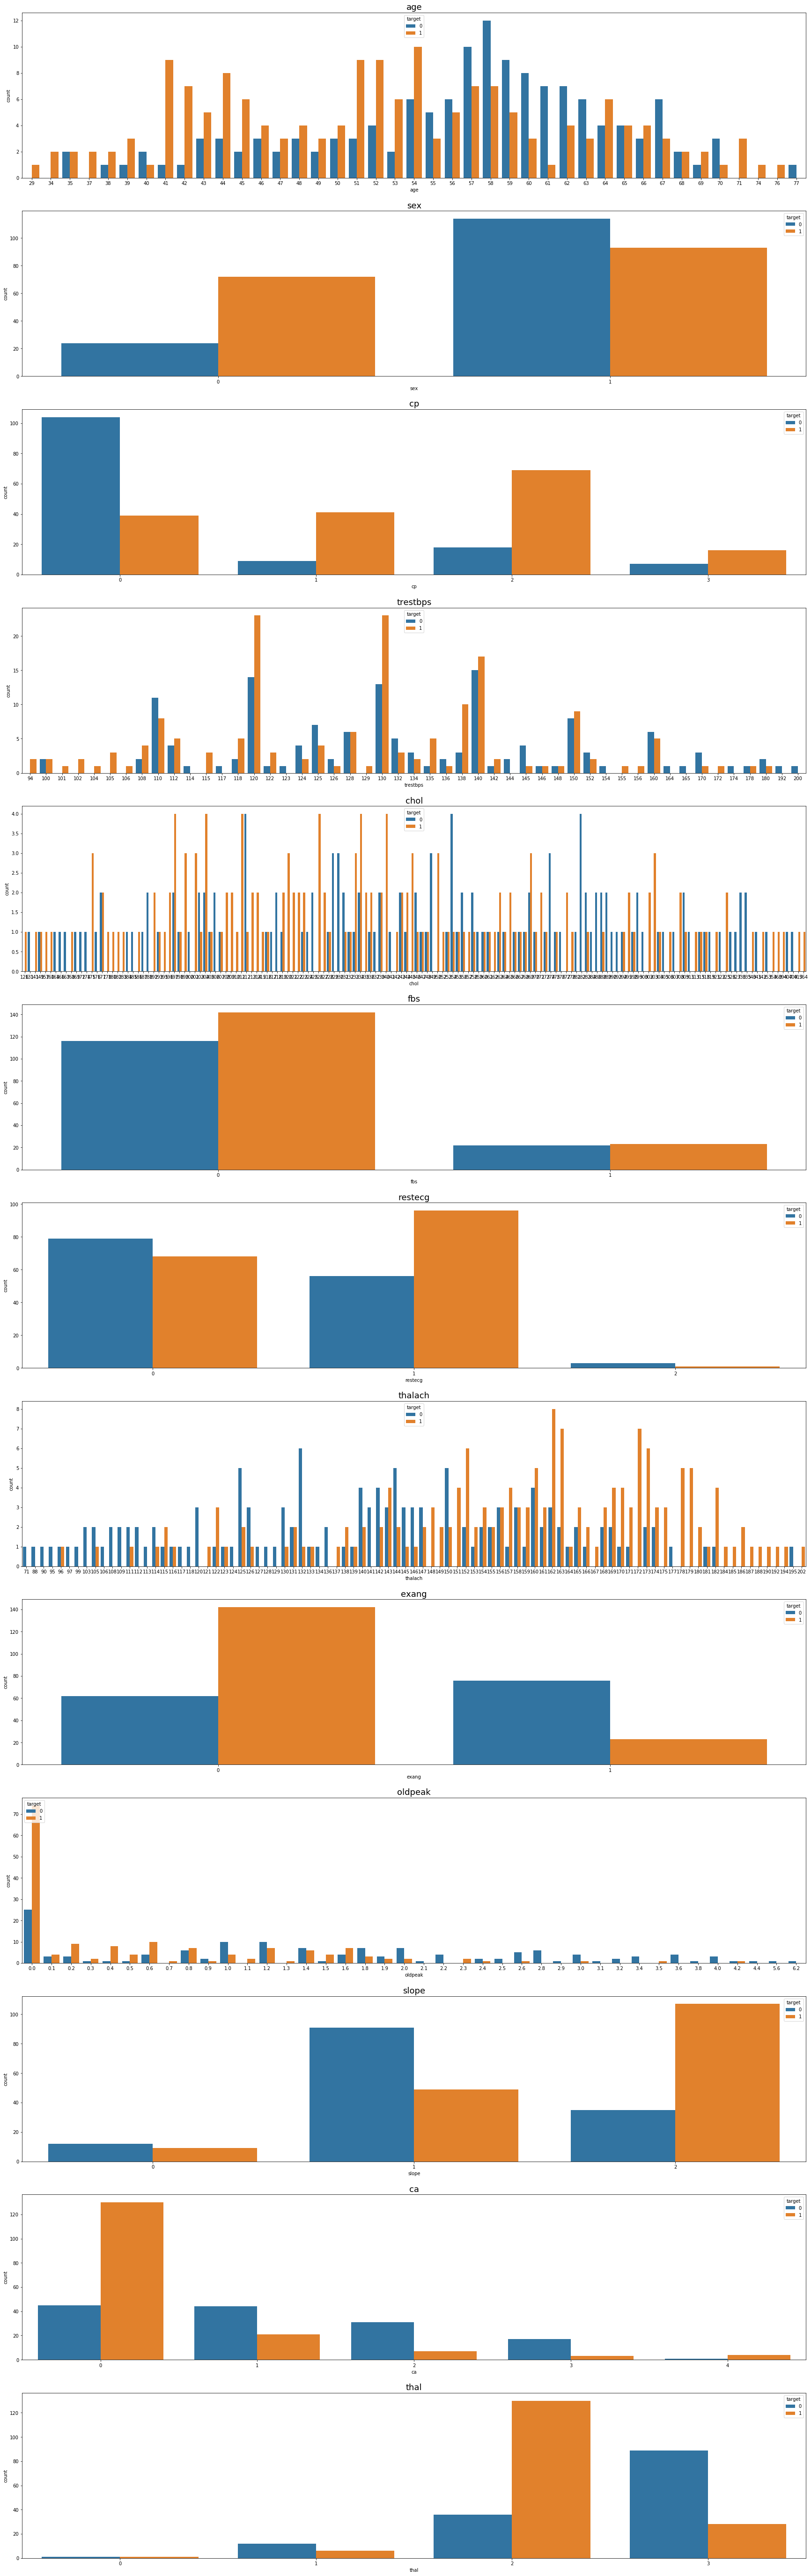

In [7]:
fig, ax = plt.subplots(len(heart_df.drop('target',axis=1).columns),figsize=(30,100))
for i,column in enumerate(heart_df.drop('target',axis=1).columns):
    sns.countplot(x=column,data=heart_df,hue='target',ax=ax[i])
    ax[i].set_title(column, size=18)

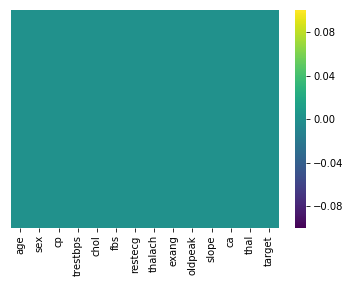

In [8]:
sns.heatmap(heart_df.isnull(), yticklabels=False, cmap="viridis")

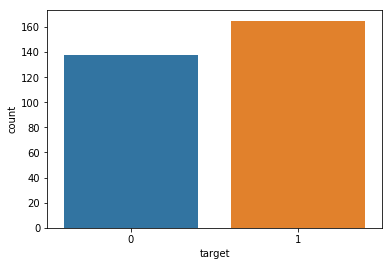

In [9]:
sns.countplot(x='target',data=heart_df)

Now I am breaking the data up into the predictors and the predicted. Notice that the predictor variable values are very different in terms of dimensions. If we use any models that rely on distance or L2 norm calculations to determine costs, we would need to standardize features. Standardization means that the dimensions of all the variables are similar. There are many ways to do this. 

In [10]:
X = heart_df.drop('target',axis=1)
y = heart_df['target']


In [11]:
from sklearn.linear_model import LogisticRegression

def perform_logistic_regression(X_train, X_test, C_param,  y_train):
    lr = LogisticRegression(C=C_param)
    lr.fit(X_train, y_train)
    return lr.predict(X_test)

def Normalize_dataframe(raw_df):
    from sklearn.preprocessing import StandardScaler
    return pd.DataFrame(StandardScaler().fit_transform(raw_df))

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=133)
norm_X_train, norm_X_test,y_train, y_test = train_test_split(Normalize_dataframe(X),y,test_size=0.25,random_state=133)

y_predicted = perform_logistic_regression(X_train, X_test, 0.5, y_train)
y_predicted_normalized = perform_logistic_regression(norm_X_train, norm_X_test, 0.5, y_train)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion matrix for unscaled X \n')
print(confusion_matrix(y_predicted,y_test))
print('\n')

print('Confusion matrix for scaled X \n')
print(confusion_matrix(y_predicted_normalized,y_test))
print('\n')


Confusion matrix for unscaled X 

[[27  7]
 [ 2 40]]


Confusion matrix for scaled X 

[[27  9]
 [ 2 38]]




Next I want to tune the cost regularization parameter C in logistic regression. I will attempt to use K-Fold cross validation to find the best C value.

In [14]:
list_of_C = [0.01, 0.1, 1, 10, 100]
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
five_fold = KFold(n_splits=5)
i = 0
y_pred_c = []
accuracies_with_C = []
for C in list_of_C:
    accuracy_score_list = []
    for fold_number,indices in enumerate(five_fold.split(norm_X_train, y_train)):
        y_pred = (perform_logistic_regression(Normalize_dataframe(X).iloc[indices[0],:], Normalize_dataframe(X).iloc[indices[1],:], C, y[indices[0]]))
        accuracy_sc = accuracy_score(y_pred,y[indices[1]])
        accuracy_score_list.append(accuracy_sc)
        print('Iteration: ', fold_number, ' Accuracy Score: ', accuracy_sc)
    accuracies_with_C.append(np.mean(accuracy_score_list))
pd.DataFrame(accuracies_with_C, index=list_of_C, columns=['Accuracy'])

    
    

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Iteration:  0  Accuracy Score:  0.9565217391304348
Iteration:  1  Accuracy Score:  0.9130434782608695
Iteration:  2  Accuracy Score:  0.9111111111111111
Iteration:  3  Accuracy Score:  0.8666666666666667
Iteration:  4  Accuracy Score:  0.6222222222222222
Iteration:  0  Accuracy Score:  0.9782608695652174
Iteration:  1  Accuracy Score:  0.9130434782608695
Iteration:  2  Accuracy Score:  0.9111111111111111
Iteration:  3  Accuracy Score:  0.8666666666666667
Iteration:  4  Accuracy Score:  0.5555555555555556
Iteration:  0  Accuracy Score:  0.9782608695652174
Iteration:  1  Accuracy Score:  0.9130434782608695


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration:  2  Accuracy Score:  0.9111111111111111
Iteration:  3  Accuracy Score:  0.8444444444444444
Iteration:  4  Accuracy Score:  0.5333333333333333
Iteration:  0  Accuracy Score:  0.9565217391304348
Iteration:  1  Accuracy Score:  0.9130434782608695
Iteration:  2  Accuracy Score:  0.9111111111111111
Iteration:  3  Accuracy Score:  0.8444444444444444
Iteration:  4  Accuracy Score:  0.5333333333333333
Iteration:  0  Accuracy Score:  0.9565217391304348
Iteration:  1  Accuracy Score:  0.9130434782608695
Iteration:  2  Accuracy Score:  0.9111111111111111
Iteration:  3  Accuracy Score:  0.8444444444444444
Iteration:  4  Accuracy Score:  0.5333333333333333


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

,Accuracy
0.01,0.853913
0.10,0.844928
1.00,0.836039
10.00,0.831691
100.00,0.831691


Let's compare this with some other popular classification models. I want to see how scaling the variables affects classification performance for each of these methods. So I will run each model on both the scaled and unscaled version of the training set and see how their performances change. 

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

models = {  'Logistic Regression': LogisticRegression(C=0.01),
            'RandomForestClassifier':RandomForestClassifier(n_estimators=500), 
            'DecisionTreeClassifier': DecisionTreeClassifier(), 
            'SVM Classifier': SVC(), 
            'KNN Classifier': KNeighborsClassifier()}

In order to be confident in my assertion, I will run 10-fold cross-validation on each model. 

In [16]:
tenFold = KFold(n_splits=10)

def runModels(X,y):
    model_accuracies = {}
    for model in models:
        accuracy_score_list = []
        for fold_number,indices in enumerate(tenFold.split(norm_X_train, y_train)):
            models[model].fit(X=X.iloc[indices[0],:],y=y[indices[0]])
            y_pred = models[model].predict(X.iloc[indices[1],:])
            accuracy_sc = accuracy_score(y_pred,y[indices[1]])
            accuracy_score_list.append(accuracy_sc)
        model_accuracies[model] = np.mean(accuracy_score_list)
    return model_accuracies
normalized_accuracies = pd.DataFrame.from_dict(runModels(Normalize_dataframe(X),y), orient='index', columns=['Scaled inputs'])
regular_accuracies = pd.DataFrame.from_dict(runModels(X,y), orient='index', columns=['Unscaled Inputs'])
pd.concat([normalized_accuracies,regular_accuracies],axis=1)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

,Scaled inputs,Unscaled Inputs
Logistic Regression,0.865810,0.770158
RandomForestClassifier,0.855929,0.860474
DecisionTreeClassifier,0.808696,0.821739
SVM Classifier,0.856324,0.718182
KNN Classifier,0.820949,0.681621
